In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

df1 = pd.read_csv('./Data/pp_dep_2017_2019.csv', delimiter=';')
G1 = nx.DiGraph()

unique_product_codes = set(df1['HS6_i']).union(set(df1['HS6_j']))

G1.add_nodes_from(unique_product_codes)

# Add the edges
for _, row in df1.iterrows():
    product_i = row['HS6_i']
    product_j = row['HS6_j']
    weight = row['f_ij']
    G1.add_edge(product_i, product_j, weight=weight)


# nx.draw(G1,node_size=50,with_labels=True)

df2 = pd.read_csv('./Data/pp_sim_2017_2019.csv', delimiter=';')
# Add the nodes
G2 = nx.Graph()

# Add the nodes

unique_product_codes = set(df2['HS6_i']).union(set(df2['HS6_j']))

G2.add_nodes_from(unique_product_codes)

# Add the edges
for _, row in df2.iterrows():
    product_i = row['HS6_i']
    product_j = row['HS6_j']
    weight = row['n_ij']
    G2.add_edge(product_i, product_j, weight=weight)


# nx.draw(G2,node_size=50,with_labels=True)


Error in callback <function _draw_all_if_interactive at 0x130bfe940> (for post_execute):


In [ ]:
def get_pdf(G):
    all_k = [G.degree(i) for i in G.nodes()]
    k = list(set(all_k))
    N = len(G.nodes())

    Pk = []
    for ki in sorted(k):
        c = 0
        for i in G.nodes():
            if G.degree(i) == ki:
                c += 1
        Pk.append(c/N)
    return sorted(k), Pk


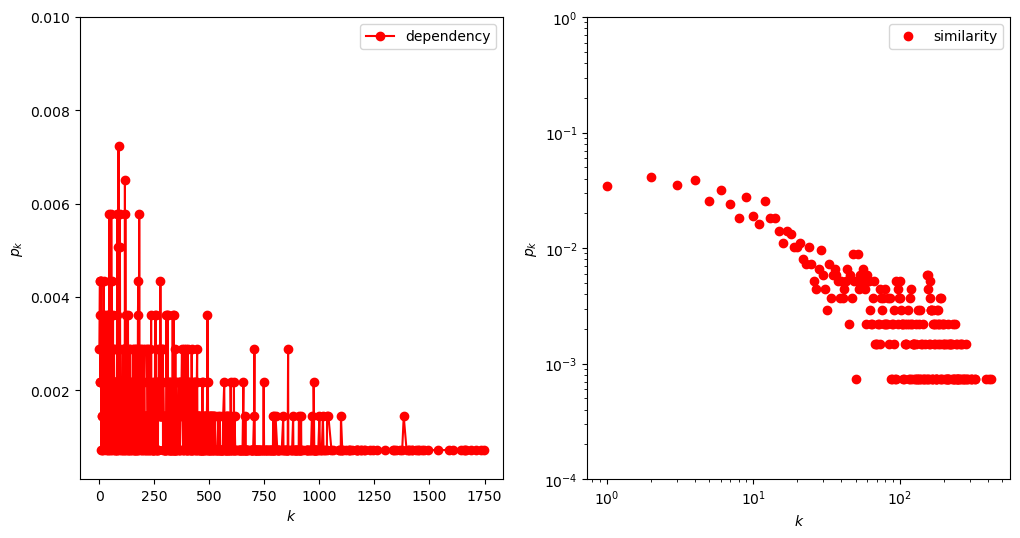

In [ ]:
k1, Pk1 = get_pdf(G1)
k2, Pk2 = get_pdf(G2)

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(k1, Pk1, 'ro', label='dependency')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-4,1e-2])


plt.subplot(122)
plt.plot(k2, Pk2, 'ro', label='similarity')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-4,1])
plt.xscale("log")
plt.yscale("log")
